## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [15]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plot Generators
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Reading in the sales data
sales_df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
sales_df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [24]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


# 1. What are the total sales for each payment method?

In [17]:
payment_df = sales_df.groupby(['payment']).size().reset_index().rename(columns={0:"num_sales"})
total_sum = payment_df['num_sales'].sum()
payment_df['percentage_sales'] = payment_df['num_sales'] / total_sum
payment_df


,payment,num_sales,percentage_sales
0,Cash,116,0.116
1,Credit card,659,0.659
2,Transfer,225,0.225


In [18]:
client_type_sales_df = sales_df.groupby(['client_type','payment']).size().reset_index().rename(columns={0:"num_sales"})
total_sum = client_type_sales_df['num_sales'].sum()
client_type_sales_df['percentage_sales'] = client_type_sales_df['num_sales'] / total_sum
client_type_sales_df


,client_type,payment,num_sales,percentage_sales
0,Retail,Cash,116,0.116
1,Retail,Credit card,659,0.659
2,Wholesale,Transfer,225,0.225


In [19]:
warehouse_payment_df = sales_df.groupby(['warehouse','payment']).size().reset_index().rename(columns={0:"num_sales"})

warehouse_payment_df['percentage_payment_sales'] = 0

for payment_type in warehouse_payment_df['payment'].unique():
    indicator = (warehouse_payment_df['payment'] == payment_type)

    warehouse_payment_df.loc[indicator,'percentage_payment_sales'] = warehouse_payment_df[indicator]["num_sales"]/warehouse_payment_df[indicator]["num_sales"].sum()

warehouse_payment_df.sort_values(by="payment")

,warehouse,payment,num_sales,percentage_payment_sales
0,Central,Cash,49,0.422414
3,North,Cash,43,0.370690
6,West,Cash,24,0.206897
1,Central,Credit card,322,0.488619
4,North,Credit card,220,0.333839
7,West,Credit card,117,0.177542
2,Central,Transfer,109,0.484444
5,North,Transfer,77,0.342222
8,West,Transfer,39,0.173333


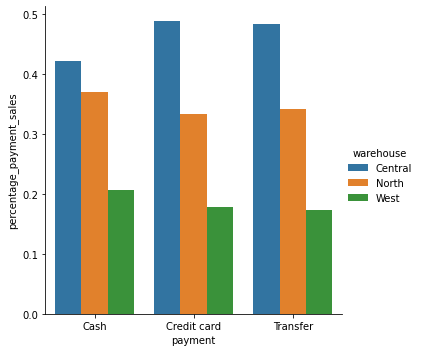

In [20]:
sns.catplot( x = 'payment' , y = 'percentage_payment_sales', data = warehouse_payment_df, hue = 'warehouse', kind = 'bar')

* There are 1000 transactions with Credit card payments accounting for 65.9% of all transactions, Transfer payments accounting for 22.5%, and Cash payments accounting for 11.6%. 
* Retail clients account for all credit card and cash payments while Wholesale clients account for all transfer payments.


* Central Warehouse account for 42% of all cash payments, North Warehouse accounts for 37% , and West Warehouse accounts for 21%.

* Central Warehouse account for 49% of all credit card payments, North Warehouse accounts for 33% , and West Warehouse accounts for 18%.

* Central Warehouse account for 48% of all transfer payments, North Warehouse accounts for 34% , and West Warehouse accounts for 17%.

# 2. What is the average unit price for each product line?

In [21]:
product_line_df = sales_df.groupby(['product_line'])['unit_price'].mean().reset_index()
product_line_df


,product_line,unit_price
0,Breaking system,17.740522
1,Electrical system,25.585130
2,Engine,60.091803
3,Frame & body,42.832229
4,Miscellaneous,22.810738
5,Suspension & traction,33.969868


In [22]:
product_line_df = sales_df.groupby(['product_line','warehouse'])['unit_price'].mean().sort_values() .reset_index().sort_values(by="product_line")
product_line_df

,product_line,warehouse,unit_price
0,Breaking system,North,17.462394
1,Breaking system,Central,17.499107
2,Breaking system,West,18.735957
7,Electrical system,North,25.525758
6,Electrical system,West,25.344722
8,Electrical system,Central,25.723297
16,Engine,Central,60.058889
15,Engine,North,59.125625
17,Engine,West,61.941111
12,Frame & body,North,42.602373


# Insights

The average cost for Breaking system is $17.74, with North warehouse having the cheapest unit price of $17.46 and West warehouse having the highest unit price of $18.74 .

The average cost for Electrical system is $25.59, with West warehouse having the cheapest unit price of $25.34 and Central warehouse having the highest unit price of $25.72 .

The average cost for Engine is is $60.09, with North warehouse having the cheapest unit price of $59.13 and West warehouse having the highest unit price of $61.94 .

The average cost for Frame & body is $42.83, with North warehouse having the cheapest unit price of $42.60 and West warehouse having the highest unit price of $43.55 .

The average cost for Miscellaneous is $22.81, with Central warehouse having the cheapest unit price of $22.73 and North warehouse having the highest unit price of $22.94 .

The average cost for Suspension & traction is $33.97, with Central warehouse having the cheapest unit price of $33.65 and West warehouse having the highest unit price of $34.80 .


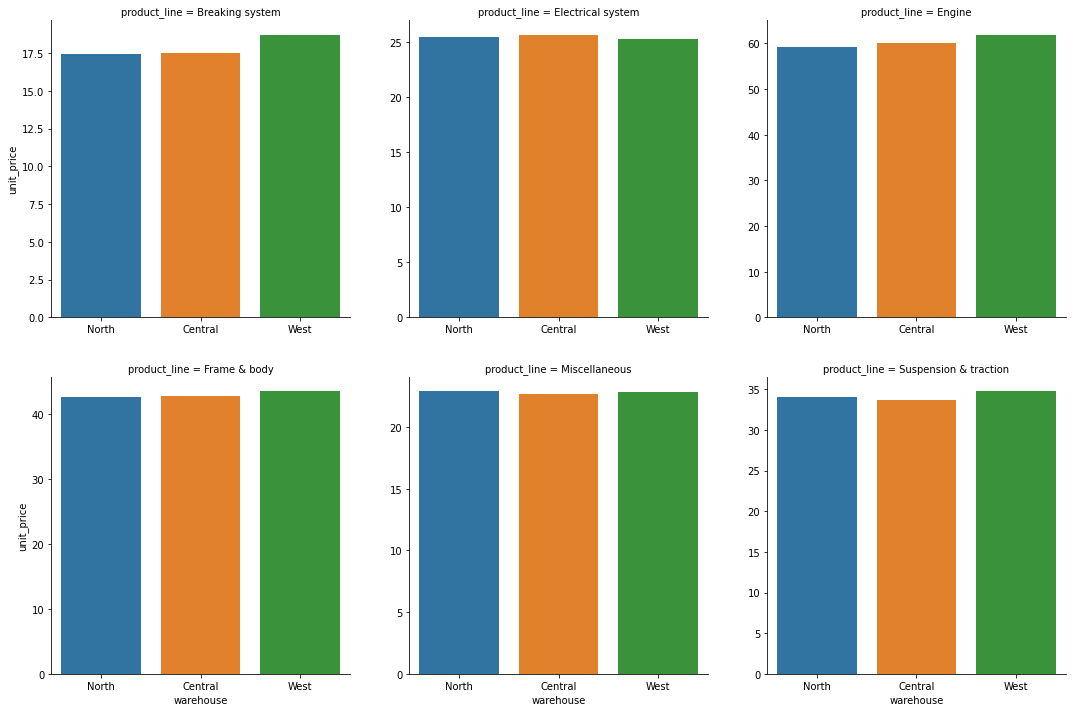

In [23]:
catplot = sns.catplot( x='warehouse' , y = 'unit_price', 
                        data = product_line_df, col = 'product_line', kind = 'bar',col_wrap= 3,
                        sharey = False)

for ax in catplot.axes.flatten():
    ax.tick_params(labelbottom=True)


plt.subplots_adjust(hspace = 0.2, wspace = 0.2)

# Extra Information

In [37]:
time_df = sales_df.copy(deep = True)
time_df['day_of_week'] = time_df['date'].dt.day_of_week
time_df['day_name'] = time_df['date'].dt.day_name()
time_df['month_of_year'] = time_df['date'].dt.month
time_df['month_name'] = time_df['date'].dt.month_name()
time_df

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,day_of_week,day_name,month_of_year,month_name
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,1,Tuesday,6,June
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,1,Tuesday,6,June
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,1,Tuesday,6,June
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,1,Tuesday,6,June
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,1,Tuesday,6,June
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card,5,Saturday,8,August
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,5,Saturday,8,August
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer,5,Saturday,8,August
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash,5,Saturday,8,August


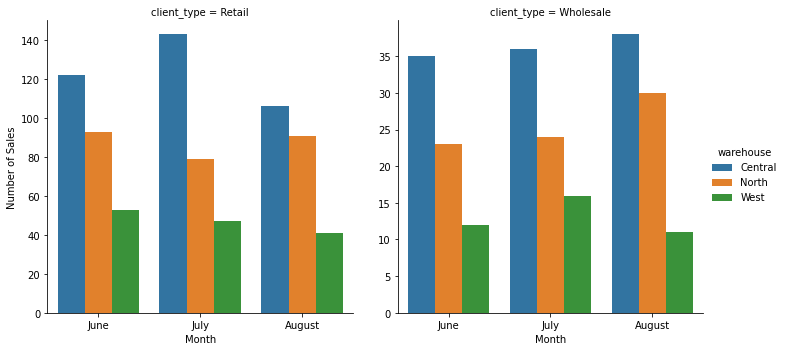

In [50]:
g = sns.catplot(x='month_name', data = time_df , hue='warehouse',col = 'client_type', kind = 'count', sharey = False)
g.set_xlabels('Month')
g.set_ylabels('Number of Sales')

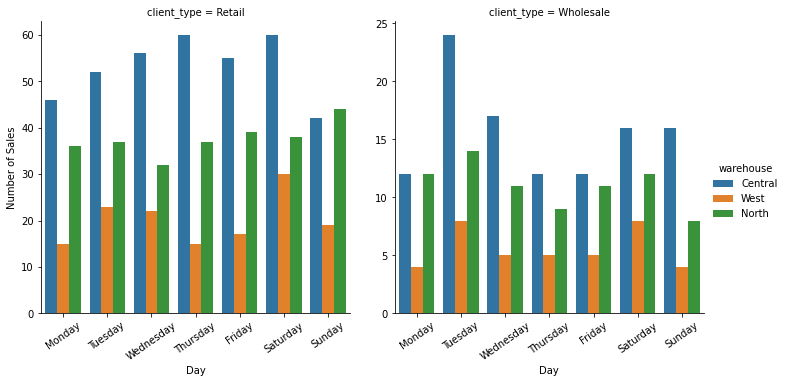

In [52]:
g = sns.catplot(x='day_name', data = time_df.sort_values(by='day_of_week') ,hue='warehouse',col = 'client_type', kind = 'count',sharey = False)

g.set_xlabels('Day')
g.set_ylabels('Number of Sales')
g.set_xticklabels(rotation=35, horizontalalignment='center')

# Insight

Retail had the most sales on July with Central Warehouse leading sales. In addition, Wholesale clients had majority of sales on August with Central Warehouse containing most sales. In comparison, West Warehouse has the least sales in June, July, and August for both retail and wholesale.

Central Warehouse had most sales on Thursday and Friday for Retail clients and Tuesday for wholesale clients. In addition, Central Warehouse has the least sales on Sunday for retail clients and Thursday for Wholesale clients.

North Warehouse had most sales from retail clients on Sunday and for wholesome clients on Tuesday. In comparison, Wednesday saw the least sales for Retail clients and Thursday for Wholesale clients. 
 
West Warehouse has the fewest sales compare to North and Central Warehouses on all days. Majority of sales happen on Saturday for Retail clients and Tuesday for Wholesale clients. The fewest sales happen on Thursday and Friday for retail clients and Monday,Wednesday, Thursday, Friday, and Sunday for Wholesale clients.